<a href="https://colab.research.google.com/github/hema-demo1/Hemavathi/blob/main/final/Hemavathi_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
The opioid crisis has become one of the most significant public health issues of the 21st century, claiming lives and wreaking havoc on communities across the United States. With increasing drug-related deaths, particularly from opioids and other substances, effective intervention strategies have become more critical than ever. This project aims to analyze the evolving trends in opioid use, overdose deaths, and the impact of various public health policies, such as the implementation of Prescription Drug Monitoring Programs (PDMPs), naloxone distribution, and educational campaigns. Through comprehensive data analysis, the project examines mortality rates, the effectiveness of interventions, and explores the socio-economic factors contributing to the opioid epidemic.

By leveraging various datasets, including mortality rates, drug use trends, and state-level data, this project presents a detailed overview of how the opioid crisis has affected different states over time. The visualizations, including bar charts, stacked area charts, and rate of change graphs, help to identify patterns in drug deaths from 2021 to 2022. These trends are crucial for policymakers, healthcare providers, and community stakeholders to devise targeted strategies for combating the epidemic. This project also underscores the importance of ongoing efforts to enhance intervention programs and allocate resources efficiently to mitigate the devastating effects of opioid misuse.



**Datasets Used:**

1. State Health Compare (SHADAC) Data: This dataset provides key health statistics for each state in the United States, including various health indicators like drug-related mortality rates. It helps to analyze and compare drug-related deaths across states, which is crucial for identifying patterns in opioid use, overdose deaths, and other related health outcomes. This dataset is essential for evaluating the impact of public health interventions in different regions. (Source: SHADAC). https://statehealthcompare.shadac.org/Data

2. CDC Drug Poisoning Mortality Data: The Centers for Disease Control and Prevention (CDC) provides data on drug poisoning mortality rates. This dataset includes information about the number of drug-related deaths, categorized by drug type, and tracks mortality trends over time. It serves as a critical resource for understanding the opioid crisis, its impact on public health, and the effectiveness of interventions like naloxone programs and public awareness campaigns. (Source: CDC Drug Poisoning Data). https://www.cdc.gov/nchs/pressroom/sosmap/drug_poisoning_mortality/drug_poisoning.htm

3. US States: This dataset contains the state names and abbreviations of the United State.
https://gist.github.com/mshafrir/2646763#file-states_hash-json

In [ ]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# **Import required Datasets**

In [ ]:
Drugs_Mortality = pd.read_csv('Drugs_Mortality.csv')

In [ ]:
Opiod_deaths = pd.read_csv("/content/Opiod_related_deaths.csv")

In [ ]:
# Load the JSON data
with open('US states.json', 'r') as file:
    us_states = json.load(file)

# Convert the dictionary to a DataFrame
us_states_df = pd.DataFrame(list(us_states.items()), columns=['State Abbreviation', 'State Name'])

# **Data Exploration and transformation**

In [ ]:
Drugs_Mortality.head()

,YEAR,STATE,RATE,DEATHS,URL
0,2022,AL,31.5,"1,492",/nchs/pressroom/states/alabama/al.htm
1,2022,AK,34.3,254,/nchs/pressroom/states/alaska/ak.htm
2,2022,AZ,37.2,"2,664",/nchs/pressroom/states/arizona/az.htm
3,2022,AR,21.7,617,/nchs/pressroom/states/arkansas/ar.htm
4,2022,CA,26.9,"10,952",/nchs/pressroom/states/california/ca.htm


In [ ]:
Drugs_Mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    551 non-null    int64  
 1   STATE   551 non-null    object 
 2   RATE    551 non-null    float64
 3   DEATHS  551 non-null    object 
 4   URL     551 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 21.6+ KB


In [ ]:
Drugs_Mortality.drop(columns=['URL'], inplace=True)

In [ ]:
# Convert 'STATE' to string and 'DEATHS' to integer
Drugs_Mortality['STATE'] = Drugs_Mortality['STATE'].astype('string')

In [ ]:
# Separate data for the years 2022 and 2021
drugs_mortality_2022 = Drugs_Mortality[Drugs_Mortality['YEAR'] == 2022]
drugs_mortality_2021 = Drugs_Mortality[Drugs_Mortality['YEAR'] == 2021]

In [ ]:
drugs_mortality_2022.head()

,YEAR,STATE,RATE,DEATHS
0,2022,AL,31.5,"1,492"
1,2022,AK,34.3,254
2,2022,AZ,37.2,"2,664"
3,2022,AR,21.7,617
4,2022,CA,26.9,"10,952"


In [ ]:
Opiod_deaths.head()

,Fips,Location,Drug Type,TimeFrame,Data Type,Data,MOE
0,1,Alabama,All drugs,2022,"Rate per 100,000",31.53263,1.6340910020399999
1,2,Alaska,All drugs,2022,"Rate per 100,000",34.28464,4.2901454727599999
2,4,Arizona,All drugs,2022,"Rate per 100,000",37.22267,1.444582681
3,5,Arkansas,All drugs,2022,"Rate per 100,000",21.68382,1.7441150826399998
4,6,California,All drugs,2022,"Rate per 100,000",26.94748,0.51287454259999998


In [ ]:
Opiod_deaths.rename(columns={'Location': 'State name'}, inplace=True)

In [ ]:
Opiod_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fips        357 non-null    int64 
 1   State name  357 non-null    object
 2   Drug Type   357 non-null    object
 3   TimeFrame   357 non-null    int64 
 4   Data Type   357 non-null    object
 5   Data        357 non-null    object
 6   MOE         357 non-null    object
dtypes: int64(2), object(5)
memory usage: 19.6+ KB


In [ ]:
Opiod_deaths['State name'] = Opiod_deaths['State name'].astype('string')
Opiod_deaths['Drug Type'] = Opiod_deaths['Drug Type'].astype('string')
Opiod_deaths['TimeFrame'] = Opiod_deaths['TimeFrame'].astype('string')
Opiod_deaths['Data Type'] = Opiod_deaths['Data Type'].astype('string')
Opiod_deaths['Data'] = pd.to_numeric(Opiod_deaths['Data'], errors='coerce')
Opiod_deaths['MOE'] = pd.to_numeric(Opiod_deaths['MOE'], errors='coerce')

In [ ]:
Opiod_deaths['TimeFrame'].value_counts()

,count
TimeFrame,
2022,357


In [ ]:
# Removing the Timeframe column as it has only one value 2022
Opiod_deaths.drop(columns=['TimeFrame'], inplace=True)

# **Data Pivoting**

In [ ]:
# Create a pivot table grouping by 'Drug Type' and averaging the 'Data' column
pivot_opiod_deaths = Opiod_deaths.pivot_table(values='Data', index='Drug Type', aggfunc='mean')

# Display the pivot table
pivot_opiod_deaths

,Data
Drug Type,
All drugs,34.607575
All opioids,26.703363
Cocaine,9.070283
Heroin,2.040657
Natural and semi-synthetic opioids,3.935754
Psychostimulants,11.396779
Synthetic opioids,24.189888


In [ ]:
# Create a pivot table grouping by 'STATE' and averaging the 'RATE' column
pivot_Drugs_Mortality = Drugs_Mortality.pivot_table(values='RATE', index='STATE', aggfunc='mean')
pivot_Drugs_Mortality

,RATE
STATE,
AK,19.363636
AL,17.463636
AR,15.300000
AZ,23.736364
CA,15.045455
CO,18.863636
CT,27.509091
DE,33.909091
District of Columbia,64.300000


# **Data merging**

**Merging 1**

In [ ]:
# Merge the two DataFrames on 'STATE' and select the necessary columns
Merged_Drugs_Mortality = pd.merge(drugs_mortality_2021[['STATE', 'DEATHS']].rename(columns={'DEATHS': 'Deaths_2021'}),
                                  drugs_mortality_2022[['STATE', 'DEATHS']].rename(columns={'DEATHS': 'Deaths_2022'}),
                                  on='STATE')

Merged_Drugs_Mortality.head()

,STATE,Deaths_2021,Deaths_2022
0,AL,"1,408","1,492"
1,AK,260,254
2,AZ,"2,730","2,664"
3,AR,637,617
4,CA,"10,901","10,952"


**Merging 2**

In [ ]:
us_states_df.rename(columns={'State Abbreviation': 'STATE'}, inplace=True)

In [ ]:
us_states_df.head()

,STATE,State Name
0,AL,Alabama
1,AK,Alaska
2,AS,American Samoa
3,AZ,Arizona
4,AR,Arkansas


In [ ]:
# Merge the two DataFrames on 'STATE'
Drugs_Mortality_Final = pd.merge(Drugs_Mortality, us_states_df, left_on='STATE', right_on='STATE', how='left')

Drugs_Mortality_Final.head()

,YEAR,STATE,RATE,DEATHS,State Name
0,2022,AL,31.5,"1,492",Alabama
1,2022,AK,34.3,254,Alaska
2,2022,AZ,37.2,"2,664",Arizona
3,2022,AR,21.7,617,Arkansas
4,2022,CA,26.9,"10,952",California


**Merging 3**

In [ ]:
# Merge the two DataFrames on 'State Name'
merged_data = pd.merge(
    Drugs_Mortality_Final[['YEAR', 'STATE', 'RATE', 'DEATHS', 'State Name']],
    Opiod_deaths,
    left_on='State Name',
    right_on='State name',
    how='left'
)

# Drop the redundant 'State name' column from Opioid_deaths DataFrame after the merge
merged_data.drop(columns=['State name'], inplace=True)

# Display the merged DataFrame
merged_data.head()

,YEAR,STATE,RATE,DEATHS,State Name,Fips,Drug Type,Data Type,Data,MOE
0,2022,AL,31.5,"1,492",Alabama,1.0,All drugs,"Rate per 100,000",31.53263,1.634091
1,2022,AL,31.5,"1,492",Alabama,1.0,All opioids,"Rate per 100,000",23.35099,1.409383
2,2022,AL,31.5,"1,492",Alabama,1.0,Cocaine,"Rate per 100,000",5.19298,0.656327
3,2022,AL,31.5,"1,492",Alabama,1.0,Heroin,"Rate per 100,000",1.01924,0.297607
4,2022,AL,31.5,"1,492",Alabama,1.0,Natural and semi-synthetic opioids,"Rate per 100,000",3.05739,0.503086


# **Data Visualizations**

**Top 10 States by Total Drug Deaths in 2021 and 2022**

<Figure size 1200x800 with 0 Axes>

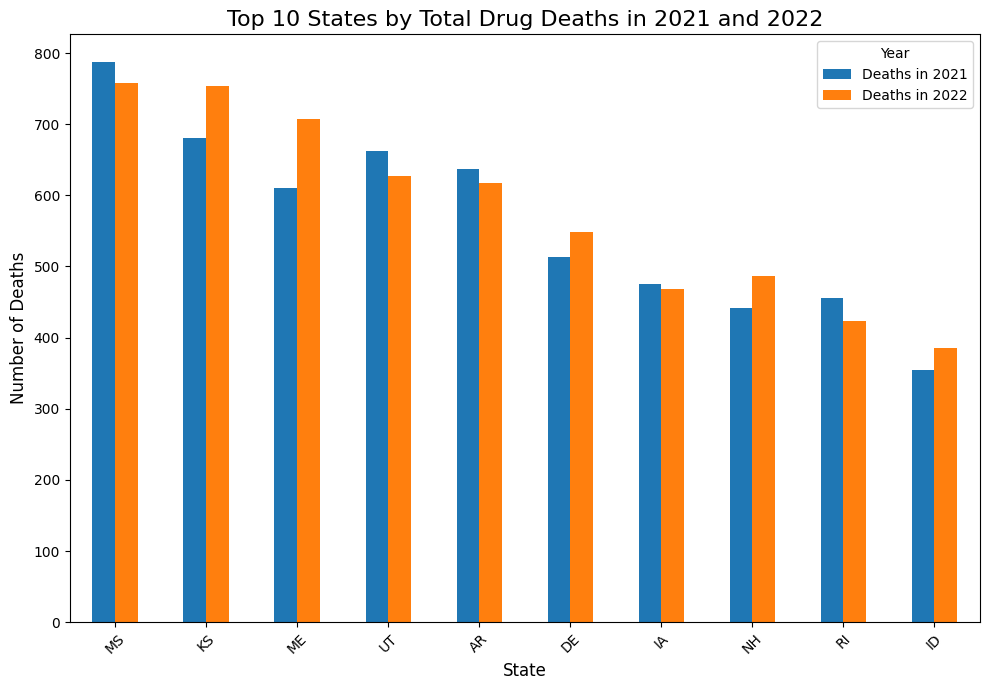

In [ ]:
Merged_Drugs_Mortality['Deaths_2021'] = pd.to_numeric(Merged_Drugs_Mortality['Deaths_2021'], errors='coerce')

Merged_Drugs_Mortality['Deaths_2022'] = pd.to_numeric(Merged_Drugs_Mortality['Deaths_2022'], errors='coerce')

# Sort the dataset by the sum of 'Deaths_2021' and 'Deaths_2022' and then select the top 10 states
top_10_sorted_states = Merged_Drugs_Mortality[['STATE', 'Deaths_2021', 'Deaths_2022']]

# Sorting the data by the sum of deaths in 2021 and 2022
top_10_sorted_states['Total Deaths'] = top_10_sorted_states['Deaths_2021'] + top_10_sorted_states['Deaths_2022']
top_10_sorted_states = top_10_sorted_states.sort_values(by='Total Deaths', ascending=False).head(10)

# Set the 'STATE' column as the index
top_10_sorted_states.set_index('STATE', inplace=True)

# Plotting the bar chart for the first 10 states after sorting
plt.figure(figsize=(12, 8))
top_10_sorted_states[['Deaths_2021', 'Deaths_2022']].plot(kind='bar', figsize=(10, 7))

# Adding titles and labels
plt.title('Top 10 States by Total Drug Deaths in 2021 and 2022', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Year', labels=['Deaths in 2021', 'Deaths in 2022'])

# Display the plot
plt.show()


The bar chart above displays the total drug deaths in 2021 and 2022 for the top 10 states. It compares the number of drug-related deaths for each state in both years, with the data for 2021 shown in blue and the data for 2022 in orange. The chart highlights the fluctuations in deaths, with states like Mississippi (MS), Kansas (KS), and Maine (ME) showing relatively high numbers in both years. The comparison allows us to observe trends and changes in the severity of the drug crisis across states.

**Drug Death Rates per 100,000 for Top 10 States by Drug Type**

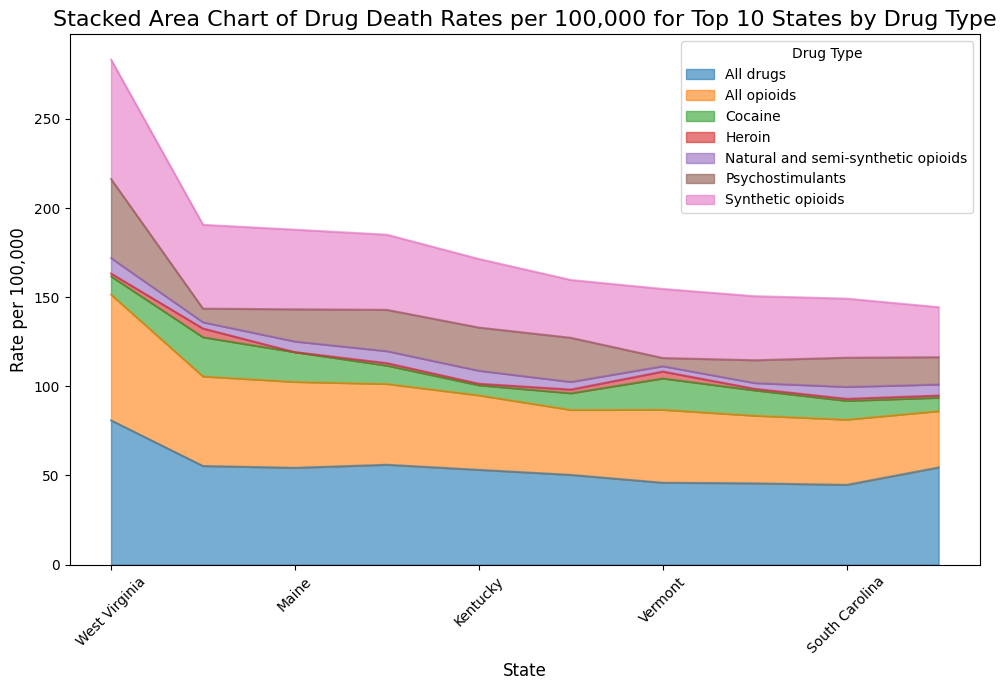

In [ ]:
import matplotlib.pyplot as plt

# Group by 'State Name' and 'Drug Type', then calculate the average 'Data'
grouped_data = merged_data.groupby(['State Name', 'Drug Type'])['Data'].mean().unstack()

# Sort the grouped data by the sum of the rates in each state, and select the top 10 states
top_10_states = grouped_data.sum(axis=1).sort_values(ascending=False).head(10)
top_10_grouped_data = grouped_data.loc[top_10_states.index]

# Plotting a stacked area chart for the top 10 states and different drug types
top_10_grouped_data.plot(kind='area', stacked=True, figsize=(10, 7), alpha=0.6)

# Adding titles and labels
plt.title('Stacked Area Chart of Drug Death Rates per 100,000 for Top 10 States by Drug Type', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Rate per 100,000', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

The stacked area chart above shows the drug death rates per 100,000 for the top 10 states, segmented by drug type. It illustrates the relative contribution of various drug categories such as all drugs, all opioids, cocaine, heroin, synthetic opioids, and psychostimulants. West Virginia and Maine appear to have the highest overall rates, with synthetic opioids and heroin contributing significantly to the overall death rates. This visualization helps to highlight the trend of increasing opioid-related deaths and the differing impacts of various drug types across states.

**Rate of change in deaths for the top 10 states**

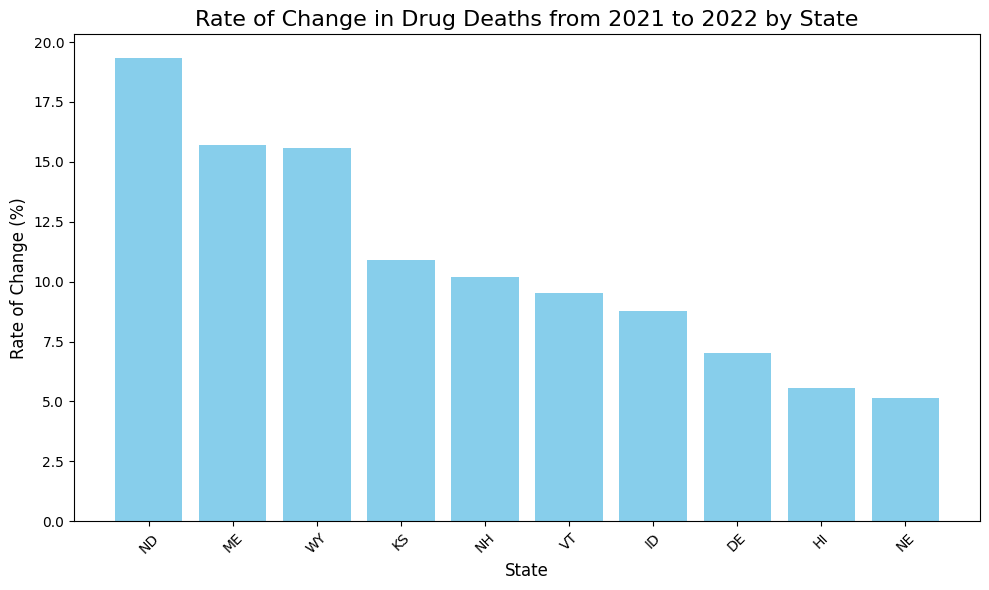

In [ ]:
import matplotlib.pyplot as plt

# Calculate the rate of change between 2021 and 2022 for each state
Merged_Drugs_Mortality['Rate_of_Change'] = ((Merged_Drugs_Mortality['Deaths_2022'] - Merged_Drugs_Mortality['Deaths_2021']) / Merged_Drugs_Mortality['Deaths_2021']) * 100

# Sort the data by rate of change in descending order and select the top 10 states
top_10_rate_of_change = Merged_Drugs_Mortality.sort_values(by='Rate_of_Change', ascending=False).head(10)

# Plotting the rate of change for the top 10 states
plt.figure(figsize=(10, 6))
plt.bar(top_10_rate_of_change['STATE'], top_10_rate_of_change['Rate_of_Change'], color='skyblue')

# Adding titles and labels
plt.title('Rate of Change in Drug Deaths from 2021 to 2022 by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Rate of Change (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


The bar chart above visualizes the rate of change in drug-related deaths from 2021 to 2022 across different states. The chart reveals that North Dakota (ND) experienced the highest rate of change, with a significant increase in drug deaths. Other states, such as Maine (ME) and Wyoming (WY), also showed considerable increases. States with lower rates of change include Nebraska (NE) and Hawaii (HI), which had smaller fluctuations in the number of drug-related deaths. This visualization helps to highlight the states with the most notable changes in opioid-related mortality over the past year.

# **Conclusion**

This project provides a thorough analysis of the opioid crisis through the examination of drug mortality rates, the rate of change in drug deaths between 2021 and 2022, and a breakdown of the data by drug type across different states. By leveraging detailed datasets and creating meaningful visualizations, we can observe the varying impacts of the opioid epidemic across states. These insights are essential for understanding regional disparities and evaluating the effectiveness of interventions aimed at reducing drug-related deaths.

In conclusion, the findings highlight the ongoing challenges posed by opioid misuse, while also emphasizing the need for continued efforts in education, prevention, and treatment. The project serves as a valuable resource for policymakers and public health professionals to fine-tune their approaches and develop more effective strategies for combating the opioid crisis. The data-driven approach presented here can help inform future policies, enhance community outreach, and improve healthcare interventions, ultimately contributing to a significant reduction in opioid-related harm.